# Requirements

In [2]:
# Required libraries.
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import spacy
import string
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")
from spacy import tokenizer
from spacy.lang.en import English
nlp = English()
tkz = tokenizer.Tokenizer(nlp.vocab)
from tqdm import tqdm
from nltk.tokenize import sent_tokenize
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import re
from bs4 import BeautifulSoup
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import unicodedata
import pickle

# Import data

#### We import *embedding*, containing posts, embedding and labels, and *features*, containing the features we extracted in the corresponding notebook

In [3]:
embedding1 = pd.read_pickle('/Users/simonefacchiano/Desktop/Data Science/SL/Project/SL-Final-Project/embedding_200mila.pkl')
embedding1 = embedding1[['embedding']]

embedding2 = pd.read_pickle('/Users/simonefacchiano/Desktop/Data Science/SL/Project/SL-Final-Project/embedding_300mila.pkl')
embedding2 = embedding2[['embedding']]

embedding = pd.concat([embedding1, embedding2], ignore_index=False)
embedding

,embedding
1,"[-0.12765062, -0.008142131, -0.02058363, -0.05..."
2,"[-0.07554571, -0.01604788, 0.037005804, 0.0478..."
3,"[-0.054309648, 0.120382324, 0.01667131, 0.0222..."
4,"[-0.044570502, -0.11837147, 0.018605148, 0.028..."
5,"[-0.014926629, 0.058680117, 0.10058031, 0.0757..."
...,...
526806,"[-0.04391508, -0.04225395, 0.008524458, -0.069..."
526807,"[-0.027237782, 0.041711215, 0.074862875, -0.03..."
526809,"[-0.023386871, -0.043085545, -0.034292, 0.0733..."
526810,"[-0.003149762, 0.06911602, 0.060416125, 0.0145..."


In [5]:
# Import dataset with additional features (TODO: metti tutto insieme nel file di preprocessing)
features = pd.read_pickle('/Users/simonefacchiano/Desktop/Data Science/SL/Project/train_features_paper.pkl')
features

,post,clean_post,gender,age_class,word_count,has_emoticon,has_punctuation,has_hope,has_hehe,has_weeks,...,has_taking,has_bill,has_hey,has_saturday,has_remember,has_party,has_walking,has_share,has_brother,has_URL
0,ooh shiny commenting,ooh shiny commenting,female,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,wuts parade suked band battle kicked ass jims ...,wuts parade suked band battle kicked ass jims ...,male,0,15,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,anymore concerned everyday bold faced liar ahe...,anymore concerned everyday bold faced liar ahe...,female,1,25,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,roof sunset posted paul,roof sunset posted paul,male,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,gawd luv nanny absolutely greatest woman earth...,gawd luv nanny absolutely greatest woman earth...,female,1,204,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526807,write injuries sand kindnesses marble french p...,write injuries sand kindnesses marble french p...,male,2,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
526808,wes dad stan,wes dad stan,female,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
526809,prefer calling nice guy fact obviously carried...,prefer calling nice guy fact obviously carried...,male,0,41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
526810,angela othello noah shaved head short hair sho...,angela othello noah shaved head short hair sho...,female,0,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
test = pd.read_pickle('/Users/simonefacchiano/Desktop/Data Science/SL/Project/SL-Final-Project/test_embedding.pkl')

test['gender'] = test['gender'].map({'male': 1, 'female': 0})
test['age_class'] = pd.cut(
        test["age"],
        bins=[12, 18, 28, 50],
        labels=[0, 1, 2]
    ).astype("int")

test

,post,age,gender,embedding,age_class
0,thabo admits defeat quiet diplomacy mbeki stat...,27,1,"[-0.06341848, -0.00037825145, -0.016663542, -0...",1
1,brainbench welcomes millionth subscriber annou...,25,1,"[-0.060284454, -0.055480707, 0.00930549, -0.01...",1
2,air jerusalem dry heavy sense weight shoulders...,23,0,"[0.010743902, 0.07802959, 0.06183355, 0.068029...",1
3,embarassing sensitive wish sensitive thick ski...,25,0,"[-0.062046394, -0.057088595, 0.06919461, 0.053...",1
4,glass artist firing excuse research fused glas...,38,0,"[-0.0025419437, -0.03190446, 0.014133493, -0.0...",2
...,...,...,...,...,...
131698,em hope job sounds million times drinks times ...,26,0,"[-0.032921113, -0.07573543, 0.013446527, -0.04...",1
131699,blood pressure high blood work whatnot tuesday...,27,0,"[-0.07032361, -0.0056662075, 0.049271625, -0.0...",1
131700,hoping news news absence inspiration enthusias...,24,0,"[0.01240979, 0.009257221, -0.009716861, 0.0415...",1
131701,slow couple egregious errors anna told wanted ...,36,1,"[-0.034908127, 0.02392359, 0.0663985, 0.002502...",2


### Fix the labels for the model

### Concat embedding and features

In [ ]:
data = pd.merge(embedding, features, left_index=True, right_index=True)
data = data[data.post.notna()]

data['gender'] = data['gender'].map({'male': 1, 'female': 0})

### Removing rows with specific word_count

(array([7.5872e+04, 1.6030e+04, 4.6920e+03, 1.7430e+03, 7.1400e+02,
        3.3900e+02, 2.0200e+02, 1.1400e+02, 7.3000e+01, 5.7000e+01]),
 array([  0. ,  99.9, 199.8, 299.7, 399.6, 499.5, 599.4, 699.3, 799.2,
        899.1, 999. ]),
 <BarContainer object of 10 artists>)

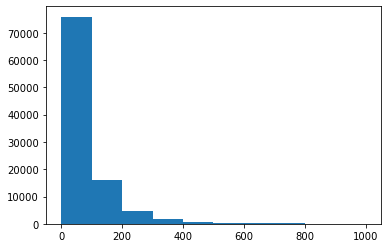

In [70]:
import matplotlib.pyplot as plt

plt.hist(data[data.word_count < 1000].word_count)

In [7]:
print(len( data[data.word_count < 3] ))
print(len( data[data.word_count >= 1000] ))

0
4


In [8]:
# Rimuovi le righe con word count inferiore a 5 o superiore a 1000
data = data[(data['word_count'] >= 3) & (data['word_count'] <= 1000)]
data.shape

(480380, 548)

# The Model: Predicting the Gender of the author

Note: the genders are balanced

In [9]:
# Let's first identify the feature matrix and the labels

X = data['embedding'].to_list() # ,'has_young_word', 'word_count', 'has_emoticon', 'has_punctuation', 'has_URL'
# X = pd.DataFrame(embedding['embedding'].to_list(), columns=[f'embedding_{i+1}' for i in range(384)])
# X = pd.concat([X, features], axis = 1)
y = data['gender'].to_list()

In [10]:
# Create the train & validation sets
# In this way, every operation of fine tuning will depend on the data observed in the validation, while the final assessment for the quality of the model will be made on the test set

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y) # stratification on the y to avoid class imbalancement

print(f'The train set has {len(X_train)} rows, while the validation set contains {len(X_val)} rows: 80% vs 20%.')

The train set has 384304 rows, while the validation set contains 96076 rows: 80% vs 20%.


##### Logistic Regression

In [11]:
# We start with a very simple Logistic Regression to see how it works

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [12]:
from sklearn import metrics

predicted = lr.predict(X_val)

print(f'Logistic Regression Accuracy  : {metrics.accuracy_score(y_val, predicted)}')
print(f'Logistic Regression Precision : {metrics.precision_score(y_val, predicted)}')
print(f'Logistic Regression Recall    : {metrics.recall_score(y_val, predicted)}')

print(f'Logistic Regression Balanced Score : {metrics.balanced_accuracy_score(y_val, predicted)}')


####

Logistic Regression Accuracy  : 0.6548045297472834
Logistic Regression Precision : 0.66300494641385
Logistic Regression Recall    : 0.6567380519772166
Logistic Regression Balanced Score : 0.6547657303820426


In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, predicted)

array([[30931, 16162],
       [17047, 31936]])

### Performance on test set

In [22]:
X_train = data['embedding'].to_list()
y_train = data['gender'].to_list()

X_test = test['embedding'].to_list()
y_test = test['gender'].to_list()

lr = LogisticRegression()
lr.fit(X_train, y_train)

predicted = lr.predict(X_test)

print(f'Logistic Regression Accuracy  : {metrics.accuracy_score(y_test, predicted)}')
print(f'Logistic Regression Balanced Score : {metrics.balanced_accuracy_score(y_test, predicted)}')

Logistic Regression Accuracy  : 0.6479390694749114
Logistic Regression Balanced Score : 0.6476627370093713


### Regularization

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [10],
    'penalty': ['l1', 'l2']
    #'max_iter': list(range(100, 800, 200)),
    #'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
lr_search = GridSearchCV(lr, param_grid=param_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
lr_search.fit(X_train, y_train)
lr_search.best_params_
# summarize
print('Best Accuracy: %.3f' % lr_search.best_score_)
print('Config: %s' % lr_search.best_params_)

In [86]:
lr = LogisticRegression(C = 10, penalty = 'l2')
lr.fit(X_train, y_train)

predicted = lr.predict(X_val)

print(f'Logistic Regression Accuracy : {metrics.accuracy_score(y_val, predicted)}')

Logistic Regression Accuracy : 0.6499049730757048


#### Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

y_pred = naive_bayes_classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.62


#### XgBoost

In [44]:
import xgboost as xgb

In [48]:
X = small_data['embedding'].to_list() # ,'has_young_word', 'word_count', 'has_emoticon', 'has_punctuation', 'has_URL'
y = small_data['gender'].to_list()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y)

In [52]:
# XGBoost (different learning rate)
learning_rate_range = np.arange(0.01, 1, 0.1)
val_XG = [] 
train_XG = []
for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(eta = lr)
    xgb_classifier.fit(X_train, y_train)
    train_XG.append(xgb_classifier.score(X_train, y_train))
    val_XG.append(xgb_classifier.score(X_val, y_val))

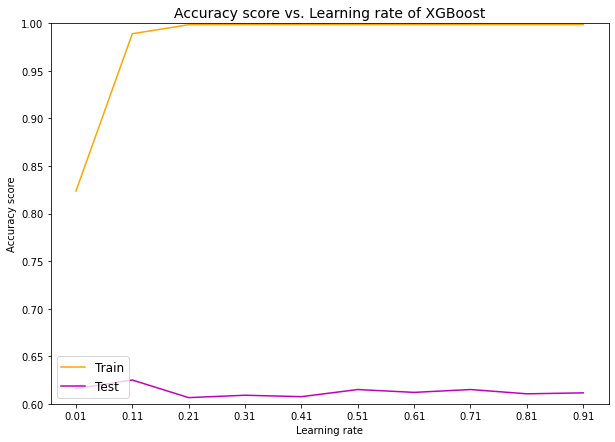

In [53]:
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.plot(learning_rate_range, val_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()    

### What if we add features?

In [ ]:
X = pd.DataFrame(data['embedding'].to_list(), columns=[f'embedding_{i+1}' for i in range(384)])
X = pd.concat([X.reset_index(drop=True), data[data.columns.difference(['embedding', 'post', 'clean_post', 'gender', 'age_class', 'has_capital'])].reset_index(drop=True)], axis = 1) 

# X = pd.DataFrame(data[data.columns.difference(['embedding', 'post', 'clean_post', 'gender', 'age_class', 'has_capital'])])

y = data['gender'].to_list()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [27]:
predicted = lr.predict(X_val)

print(f'Logistic Regression Accuracy : {metrics.accuracy_score(y_val, predicted)}')
print(f'Logistic Regression Precision: {metrics.precision_score(y_val, predicted)}')
print(f'Logistic Regression Recall   : {metrics.recall_score(y_val, predicted)}')

Logistic Regression Accuracy : 0.653014241353464
Logistic Regression Precision: 0.6494701059788043
Logistic Regression Recall   : 0.6858832224685883


In [95]:
confusion_matrix(y_val, predicted)

array([[6159, 3353],
       [3465, 6309]])

In [100]:
data_val = data.iloc[X_val.index][['post', 'word_count', 'gender']]
data_val['gender_pred'] = predicted

data_val

,post,word_count,gender,gender_pred
104274,loophole h bush administration economic stimul...,417.0,1,1
8574,know p j best thing world complicated right wr...,131.0,0,0
74313,year star wars fan film awards finalists fate ...,36.0,1,1
95729,example pictures,9.0,1,1
103380,section home best loyal passionate soccer fans...,931.0,1,1
...,...,...,...,...
104044,found today stories going published new yinzer...,88.0,0,1
92215,apologies sparta collapse looking recent posts...,645.0,1,0
3619,loads things write aabout right right feel lik...,49.0,0,0
29998,look people drugs drink excessively sex outsid...,561.0,1,1


In [101]:
data_val[data_val.gender != data_val.gender_pred]

,post,word_count,gender,gender_pred
34571,yoz todae skl le actualyl bad la onli dat mi v...,203.0,1,0
100221,working like hell got low self respect level j...,382.0,1,0
65813,real holy time yesterday mike cope mentions ki...,383.0,1,0
12907,mobile phone closed monday long irritating sto...,34.0,0,1
89444,avenged sevenfold amazing band man ought cd go...,44.0,0,1
...,...,...,...,...
69575,xe com universal currency converter tm,8.0,0,1
17456,ok post tell aabout title late test results ex...,152.0,1,0
82432,imagine life time,14.0,0,1
104044,found today stories going published new yinzer...,88.0,0,1


In [236]:
param_grid = {
    'C': [0.1, 1, 10, 50, 100, 1000],
    'penalty': ['l1', 'l2'] #,
    # 'max_iter': list(range(100,800,100)),
    #'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
lr_search = GridSearchCV(lr, param_grid=param_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
lr_search.fit(X_train , y_train)
lr_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % lr_search.best_score_)
print('Config: %s' % lr_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.1s
[CV 2/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.637 total time=   1.5s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.633 total time=   1.5s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.631 total time=   1.5s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.625 total time=   1.5s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.636 total time=   1.6s
[CV 1/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....................C=1, penalty=l

In [237]:
lr = LogisticRegression(C = 1, penalty = 'l2')
lr.fit(X_train, y_train)

LogisticRegression(C=1)

In [238]:
predicted = lr.predict(X_val)

print(f'Logistic Accuracy after Regularization : {metrics.accuracy_score(y_val, predicted)}')
print(f'Logistic Precision after Regularization: {metrics.precision_score(y_val, predicted)}')
print(f'Logistic Recall after Regularization   : {metrics.recall_score(y_val, predicted)}')

Logistic Accuracy after Regularization : 0.63975
Logistic Precision after Regularization: 0.6488718775181306
Logistic Recall after Regularization   : 0.6339927172522389


## Confrontare diversi modelli

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

#  defining models and associated parameters
models = [RandomForestClassifier(n_estimators = 100, max_depth=5, random_state=42), 
          LinearSVC(random_state=42),
          LogisticRegression(random_state=42)]

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) # With StratifiedKFold, the folds are made by preserving the percentage of samples for each class.

scoring = ['accuracy', 'f1_macro', 'recall_macro', 'precision_macro']

#  iterative loop print metrics from each model
for model in tqdm(models):
    model_name = model.__class__.__name__
    result = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring)
    print("%s: Mean Accuracy = %.2f%%; Mean F1-macro = %.2f%%; Mean recall-macro = %.2f%%; Mean precision-macro = %.2f%%" 
          % (model_name, 
             result['test_accuracy'].mean()*100, 
             result['test_f1_macro'].mean()*100, 
             result['test_recall_macro'].mean()*100, 
             result['test_precision_macro'].mean()*100))

 33%|███▎      | 1/3 [03:15<06:31, 195.59s/it]

RandomForestClassifier: Mean Accuracy = 61.73%; Mean F1-macro = 61.65%; Mean recall-macro = 61.67%; Mean precision-macro = 61.74%


 67%|██████▋   | 2/3 [03:42<01:36, 96.22s/it] 

LinearSVC: Mean Accuracy = 64.03%; Mean F1-macro = 64.02%; Mean recall-macro = 64.03%; Mean precision-macro = 64.03%


100%|██████████| 3/3 [04:06<00:00, 82.03s/it]

LogisticRegression: Mean Accuracy = 63.95%; Mean F1-macro = 63.95%; Mean recall-macro = 63.95%; Mean precision-macro = 63.95%


## Age_class

In [38]:
X = data['embedding'].to_list() # ,'has_young_word', 'word_count', 'has_emoticon', 'has_punctuation', 'has_URL'
# X = pd.DataFrame(embedding['embedding'].to_list(), columns=[f'embedding_{i+1}' for i in range(384)])
# X = pd.concat([X, features], axis = 1)
y = data['age_class'].to_list()

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y) # stratification on the y to avoid class imbalancement

print(f'The train set has {len(X_train)} rows, while the validation set contains {len(X_val)} rows: 80% vs 20%.')

The train set has 74710 rows, while the validation set contains 18678 rows: 80% vs 20%.


In [40]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight = {0: 1.1, 1: 1, 2: 1.25})
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.1, 1: 1, 2: 1.25},
                   multi_class='multinomial')

In [41]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

predicted = model.predict(X_val)

print(f'Multinomial Logistic Regression Accuracy : {metrics.accuracy_score(y_val, predicted)}')
print(f'Multinomial Logistic Regression Balanced Score : {metrics.balanced_accuracy_score(y_val, predicted)}')

Multinomial Logistic Regression Accuracy : 0.6050969054502623
Multinomial Logistic Regression Balanced Score : 0.5389280295681095


In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, predicted)

array([[4085, 2068,  198],
       [1720, 6314,  778],
       [ 395, 2261,  859]])

### Performance on test set

In [25]:
X_train = data['embedding'].to_list()
y_train = data['age_class'].to_list()

X_test = test['embedding'].to_list()
y_test = test['age_class'].to_list()

lr = LogisticRegression()
lr.fit(X_train, y_train)

predicted = lr.predict(X_test)

print(f'Logistic Regression Accuracy  : {metrics.accuracy_score(y_test, predicted)}')
print(f'Logistic Regression Balanced Score : {metrics.balanced_accuracy_score(y_test, predicted)}')

Logistic Regression Accuracy  : 0.6007301845403366
Logistic Regression Balanced Score : 0.5106510235753629


#### What if we add the features?

In [179]:
features.columns

Index(['clean_post', 'has_emoticon', 'has_punctuation', 'has_URL',
       'has_capital', 'girl_word', 'boy_word', 'young_word', 'medium_word',
       'old_word', 'word_count'],
      dtype='object')

In [33]:
X = pd.DataFrame(data['embedding'].to_list(), columns=[f'embedding_{i+1}' for i in range(384)])
X = pd.concat([X.reset_index(drop=True), data[data.columns.difference(['embedding', 'post', 'clean_post', 'gender', 'age_class', 'has_capital'])].reset_index(drop=True)], axis = 1) 

y = data['age_class'].to_list()

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y) # stratification on the y to avoid class imbalancement

print(f'The train set has {len(X_train)} rows, while the validation set contains {len(X_val)} rows: 80% vs 20%.')

The train set has 74710 rows, while the validation set contains 18678 rows: 80% vs 20%.


In [35]:
model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [37]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

predicted = model.predict(X_val)

print(f'Multinomial Logistic Regression Accuracy : {metrics.accuracy_score(y_val, predicted)}')
print(f'Multinomial Logistic Regression Accuracy : {metrics.balanced_accuracy_score(y_val, predicted)}')


Multinomial Logistic Regression Accuracy : 0.6038655102259343
Multinomial Logistic Regression Accuracy : 0.5015687138751751


In [179]:
confusion_matrix(y_val, predicted)

array([[4110, 2559,  120],
       [1573, 7404,  486],
       [ 339, 2803,  606]])